<a href="https://colab.research.google.com/github/aytekin827/TIL/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [ ]:
 mnist = tf.keras.datasets.mnist

 (x_train, y_train), (x_test, y_test) = mnist.load_data()
 x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(y_train[0])

(60000, 28, 28)
(60000,)
5


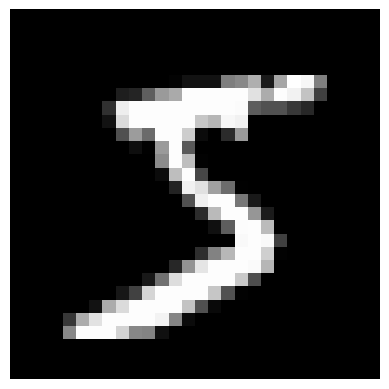

0번째 훈련데이터 정답 : 5


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(x_train[0], cmap=cm.gray)
plt.axis('off')
plt.show()

print('0번째 훈련데이터 정답 :', y_train[0])

# 0. 머신러닝 모델 빌드

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.19055085, 0.1216677 , 0.08560269, 0.13366705, 0.07725433,
        0.03573426, 0.06968816, 0.09697691, 0.08369301, 0.105165  ]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.10938995, 0.10210849, 0.09849156, 0.10334111, 0.09767275,
        0.0937004 , 0.09693652, 0.09961823, 0.09830365, 0.10043725]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.367653

In [ ]:
model.fit(x_train, y_train, epochs=5) # 기본 batch size는 32 인듯

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2937 - accuracy: 0.9164
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1429 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1077 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0871 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0754 - accuracy: 0.9775


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0753 - accuracy: 0.9782 - 435ms/epoch - 1ms/step


[0.07526145130395889, 0.9782000184059143]

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
np.argmax(probability_model(x_test[:1]))

7

---

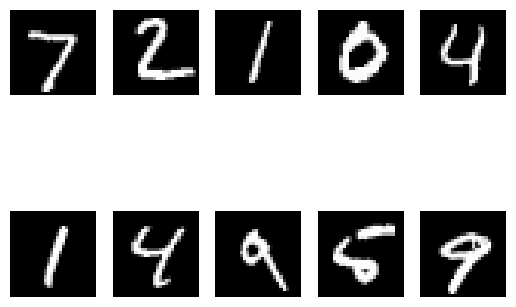

In [ ]:
# 테스트데이터셋 10개 눈으로 확인
for i, img in enumerate(x_test[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(img, cmap=cm.gray)
    plt.axis('off')
plt.show()

In [ ]:
# 테스트데이터셋 예측값 확인

import numpy as np

predict_list = [np.argmax(i) for i in probability_model(x_test[:10])]
for label, pred in zip(y_test[:10], predict_list):
    print(label==pred, label, pred)

True 7 7
True 2 2
True 1 1
True 0 0
True 4 4
True 1 1
True 4 4
True 9 9
True 5 5
True 9 9


# 1. 이미지 분류

https://www.tensorflow.org/tutorials/images/classification?hl=ko

## 1-1초기설정 및 데이터탐색

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


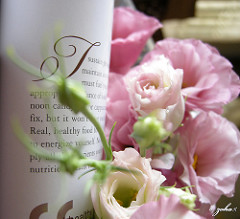

In [4]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

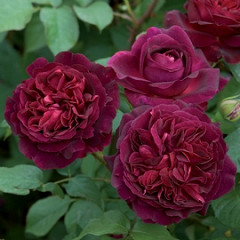

In [5]:
PIL.Image.open(str(roses[1]))

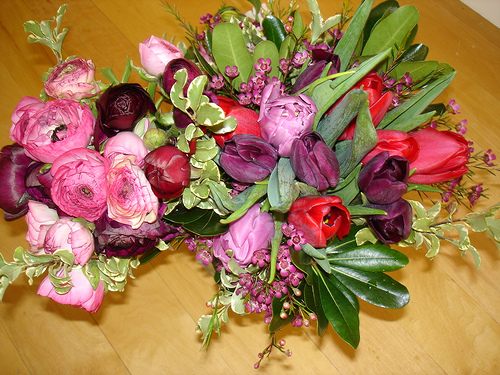

In [6]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

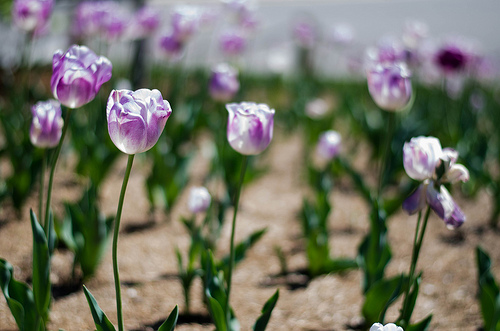

In [7]:
PIL.Image.open(str(tulips[1]))

## 1-2데이터세트 만들기

In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
# 검증 분할 세트 분류
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## 1-3 데이터 시각화하기

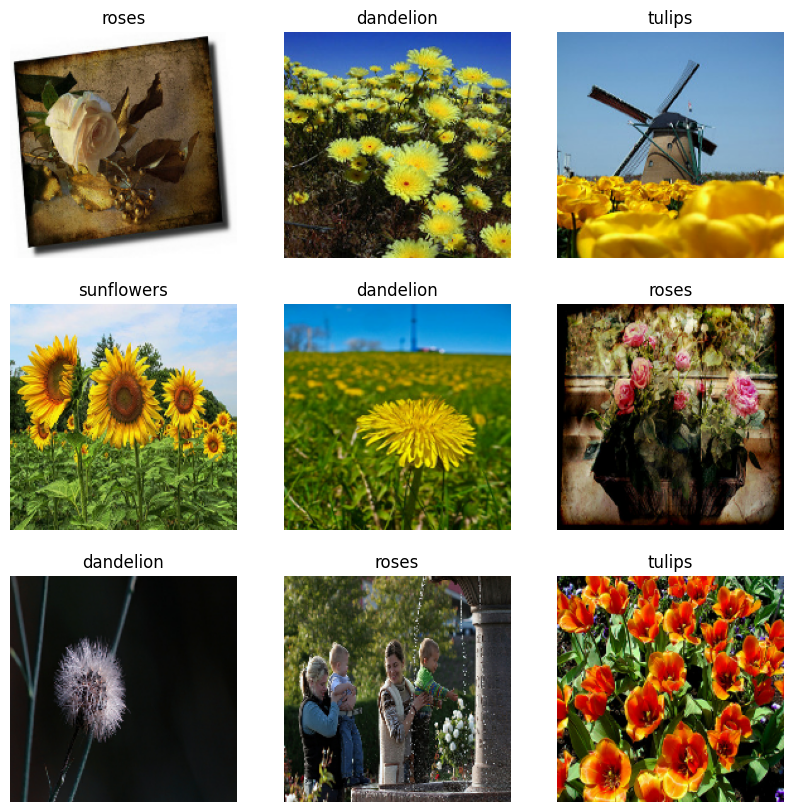

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
# 데이터셋 구조 이해하기
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


## 1-4 성능을 높이도록 데이터세트 구성하기



✅ AUTOTUNE : 텐서플로우의 데이터 파이프라인 성능 자동 최적화  
✅ cache() : 캐시에 저장하여 데이터 로드 비용 절감,  첫 epoch 동안 디스크에서 이미지를 로드한 후 이미지를 메모리에 유지  
✅ prefetch : 데이터를 배치 단위로 모델에 공급하는 동안 I/O 작업과 모델의 계산을 겹치게 함으로써 데이터 로딩과 모델 학습 간에 불필요한 대기 시간을 줄입니. 즉, 훈련하는 동안 데이터 전처리 및 모델 실행을 중첩

In [13]:
AUTOTUNE = tf.data.AUTOTUNE # 텐서플로우의 데이터 파이프라인 성능 자동 최적화

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## 1-5 데이터 표준화하기

- RGB 채널 값이 [0,1]범위의 값으로 표준화 시키기. 왜? 신경망 학습에 더 좋음(일반적으로)
- normalization_layer로 데이터셋을 정규화함.
- iter, next 파이썬 내장함수를 이용하여 전처리된 데이터를 탐색함

In [14]:
normalization_layer = layers.Rescaling(1./255)

In [15]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(f'min value: {np.min(first_image)}, max value: {np.max(first_image)}')

min value: 0.0, max value: 1.0


## 1-6 기본 keras 모델

### 1-6-1 모델만들기

In [16]:
num_classes = len(class_names)
input_shape = (img_height, img_width, 3)
print(f'{num_classes=}')
print(f'{input_shape=}')

num_classes=5
input_shape=(180, 180, 3)


In [17]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=input_shape),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### 1-6-2 모델 컴파일

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 1-6-3 모델 훈련하기 (fit매서드)

In [19]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 20s 63ms/step - loss: 1.4386 - accuracy: 0.3726 - val_loss: 1.1090 - val_accuracy: 0.5681
Epoch 2/10
92/92 [==============================] - 3s 30ms/step - loss: 1.0195 - accuracy: 0.5960 - val_loss: 0.9770 - val_accuracy: 0.6008
Epoch 3/10
92/92 [==============================] - 3s 29ms/step - loss: 0.8377 - accuracy: 0.6832 - val_loss: 0.9104 - val_accuracy: 0.6376
Epoch 4/10
92/92 [==============================] - 3s 34ms/step - loss: 0.6654 - accuracy: 0.7558 - val_loss: 0.9787 - val_accuracy: 0.6144
Epoch 5/10
92/92 [==============================] - 2s 25ms/step - loss: 0.4576 - accuracy: 0.8386 - val_loss: 0.9394 - val_accuracy: 0.6444
Epoch 6/10
92/92 [==============================] - 2s 21ms/step - loss: 0.2798 - accuracy: 0.9084 - val_loss: 1.1855 - val_accuracy: 0.6376
Epoch 7/10
92/92 [==============================] - 2s 21ms/step - loss: 0.1401 - accuracy: 0.9584 - val_loss: 1.4550 - val_accuracy: 0.6308
Epoch 8/10
9

### 1-6-4 훈련결과 확인 및 시각화

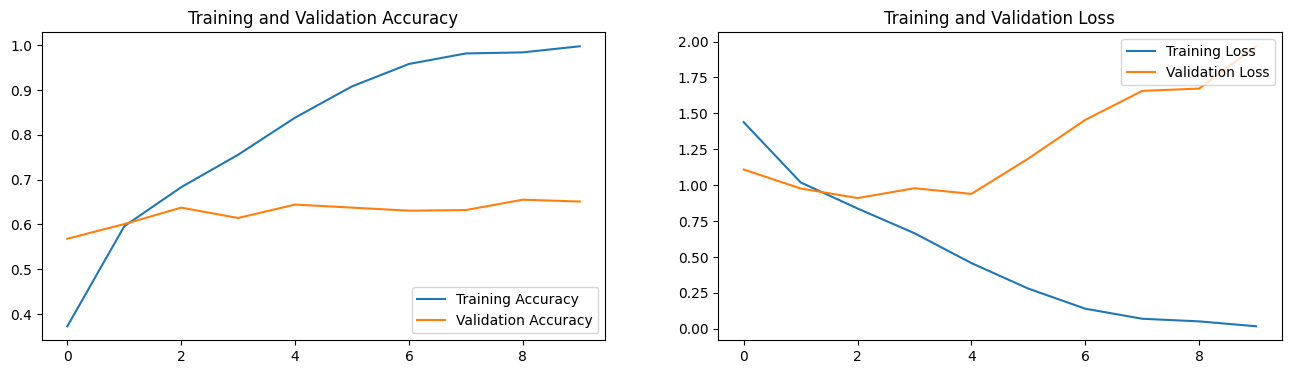

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

검증셋에서의 정확도가 많이 떨어진다. 즉 모델의 성능이 좋지 않음을 알 수 있다.

## 1-7 과대적합(over fitting)



위에 처럼 훈련데이터 정확성과 검증데이터 정확성이 차이가 많이 나는 경우 과대적합의 신호로 볼 수 있다.

### 1-7-1 데이터증강

훈련데이터의 수를 더 증가시키는 것

In [21]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [22]:
data_augmentation.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 180, 180, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 180, 180, 3)       0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


증강처리된 데이터를 눈으로 확인!

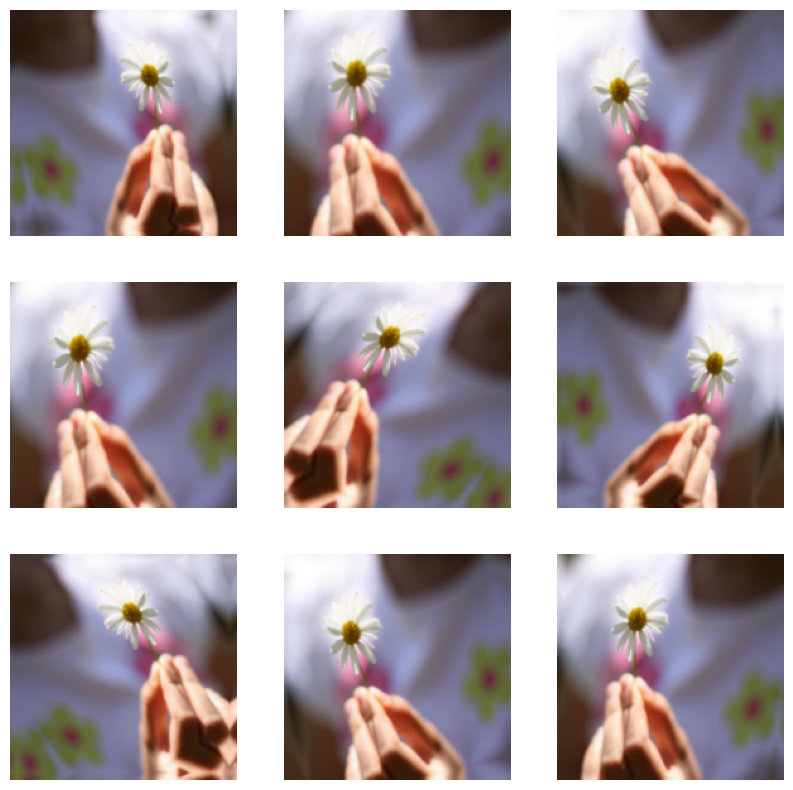

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### 1-7-2 드롭아웃

In [24]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2), # 추가된 layer
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [26]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 5s 33ms/step - loss: 1.3735 - accuracy: 0.4138 - val_loss: 1.2127 - val_accuracy: 0.4986
Epoch 2/15
92/92 [==============================] - 3s 30ms/step - loss: 1.0809 - accuracy: 0.5719 - val_loss: 1.0357 - val_accuracy: 0.5817
Epoch 3/15
92/92 [==============================] - 3s 29ms/step - loss: 0.9783 - accuracy: 0.6114 - val_loss: 0.9625 - val_accuracy: 0.6322
Epoch 4/15
92/92 [==============================] - 3s 29ms/step - loss: 0.9246 - accuracy: 0.6468 - val_loss: 0.8682 - val_accuracy: 0.6403
Epoch 5/15
92/92 [==============================] - 3s 31ms/step - loss: 0.8628 - accuracy: 0.6727 - val_loss: 0.8726 - val_accuracy: 0.6403
Epoch 6/15
92/92 [==============================] - 3s 30ms/step - loss: 0.8220 - accuracy: 0.6914 - val_loss: 0.8576 - val_accuracy: 0.6717
Epoch 7/15
92/92 [==============================] - 3s 29ms/step - loss: 0.7784 - accuracy: 0.7020 - val_loss: 0.8268 - val_accuracy: 0.6812
Epoch 8/15
92

## 1-8 드롭아웃 적용 후 훈련결과 확인

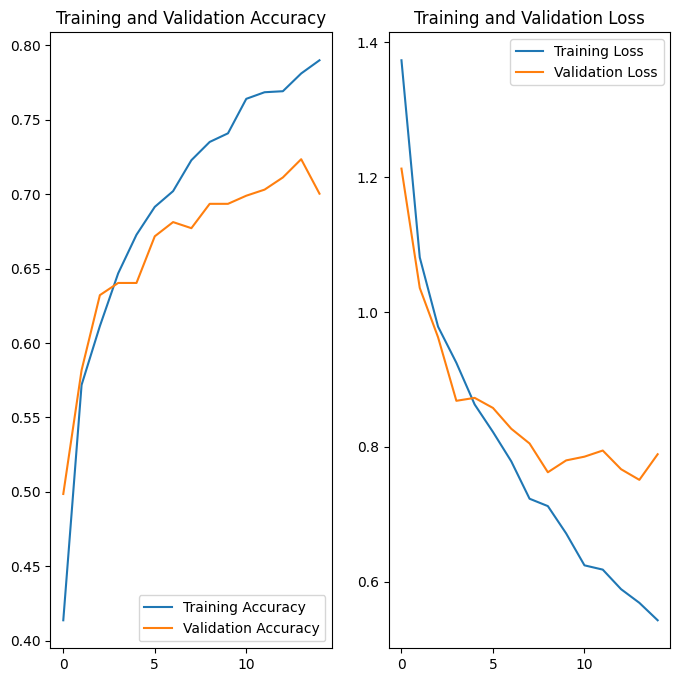

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 1-9 새로운 데이터로 예측하기(inference)

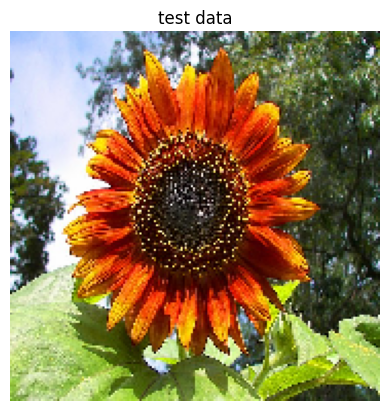

In [61]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
plt.imshow(img)
plt.title('test data')
plt.axis('off')
plt.show()

In [28]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 212ms/step
This image most likely belongs to sunflowers with a 99.47 percent confidence.


## 1-10 TensorFlow Lite 사용하기

TF Lite는 모바일 및 임베디드 기기에서 머신 러닝을 가능하게 해주는 도구 세트

In [29]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [31]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

변환된 모델의 서명을 인쇄하여 입/출력의 **'이름'**을 얻음

In [32]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_1_input'], 'outputs': ['outputs']}}

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [34]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [55]:
predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
print(predictions_lite)
score_lite = tf.nn.softmax(predictions_lite)
print(score_lite)

[[-3.1866205  -0.49492675 -0.04850229  6.7245307   1.0429485 ]]
tf.Tensor([[4.9355032e-05 7.2831451e-04 1.1381477e-03 9.9469417e-01 3.3900780e-03]], shape=(1, 5), dtype=float32)


In [56]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to sunflowers with a 99.47 percent confidence.


*   tflite모델을 통한 추론 결과 -> 99.47%로 sunflowers
*   원래 모델을 통한 추론 결과 => 99.47%로 sunflowers



In [57]:
print(np.max(np.abs(predictions - predictions_lite)))

9.536743e-07


# 2. 전이학습 및 미세조정(fine tuning)

https://www.tensorflow.org/tutorials/images/transfer_learning?hl=ko

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

%matplotlib inline

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 26
Number of test batches: 6


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)